<a href="https://colab.research.google.com/github/Deep-of-Machine/AI_Academy/blob/main/6_1_FCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import transforms
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


torchvision.models에서 'COCO train2017' 데이터셋의 일부에서 학습된 모델을 가져옵니다.    
'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor' 의 20개 클래스가 있습니다.

In [ ]:
classes = ['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 
           'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 
           'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

In [ ]:
model = torchvision.models.segmentation.fcn_resnet50(pretrained = True).to(device)
model.eval()

Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth


  0%|          | 0.00/135M [00:00<?, ?B/s]

FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

(3, 224, 224)의 샘플을 입력했을 때 모델의 출력 형태를 알아봅시다

In [ ]:
sample_image = torch.rand(3,224,224)
output = model(sample_image.view(1,3,224,224).to(device))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
output.keys()

odict_keys(['out', 'aux'])

In [ ]:
output['out'].shape

torch.Size([1, 21, 224, 224])

샘플 이미지를 업로드해서, 모델의 예측은 어떠한지 알아봅니다

In [ ]:
from google.colab import files
files.upload()

Saving image01.png to image01.png
Saving image02.jpg to image02.jpg


{'image01.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xeb\x00\x00\x01p\x08\x02\x00\x00\x00\x170\xc4v\x00\x00\x80\x00IDATx\xda\xec\xfdg\x8fe[~\xdf\x87\xaf\xb8\xd7\xce\'\xc7\x8a]\xd5\xd5\xb1\xba\xfb\xe60w\xc8\xb9\xa3\x19\x8a\xe4\x88\xa4\xfe\x10\xa5\xbf\r\xd80d\x92\xa2$\xcb/B\x80\xf5\n\xfc\xc8\xb0l\x8a\xb2,\xd8\xb0 1\x8cH\x91\x9c<s\xef\xdc\xd07\xf5\xedX]]9\x9c\x1cvN+\x18\xd5wxE[O\x0c\t\xf0\xc0\xc0\xf9<8\xb5O\xed}\n\xd8\xe7\xec\xfa\xac\xef\xfa\xad\xdf\xc6!J)\xb0`\xc1\x82\x05\x0b\xfe?\x08Z\xbc\x05\x0b\x16,X\xb00\xf8\x82\x05\x0b\x16,X\x18|\xc1\x82\x05\x0b\x16,\x0c\xbe`\xc1\x82\x05\x0b\x83/X\xb0`\xc1\x82\x85\xc1\x17,X\xb0`\xc1\xc2\xe0\x0b\x16,X\xb00\xf8\x82\x05\x0b\x16,X\x18|\xc1\x82\x05\x0b\x16,\x0c\xbe`\xc1\x82\x05\x0b\x16\x06_\xb0`\xc1\x82\x85\xc1\x17,X\xb0`\xc1\xc2\xe0\x0b\x16,X\xb0`a\xf0\x05\x0b\x16,X\x18|\xc1\x82\x05\x0b\x16,\x0c\xbe`\xc1\x82\x05\x0b\xfe_\x83\xfcG\xbf\xf2+o\xbd\x8c1\x86\x10*\xa5\x84\x10\x17\xa3\x01B\xea9\x10B\x84.\xc6\x86/\xbe>\x02\xe1\x8b]R\xca\x8b\x83\x01\

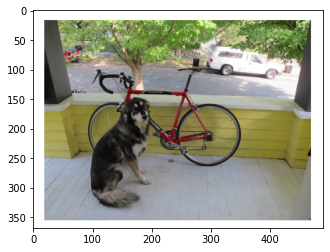

In [ ]:
img = Image.open('./image01.png')
plt.imshow(img)
plt.show()

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])])

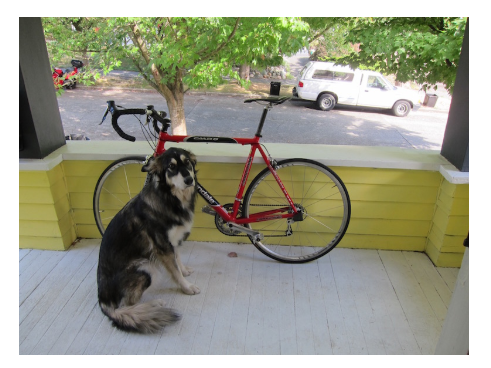

In [ ]:
img

In [ ]:
img_np = np.asarray(img)

In [ ]:
input = transform(img_np)

In [ ]:
output = model(input.view(1,3,368,491).to(device))

In [ ]:
output = output['out']

In [ ]:
output = output[0]
print(output.shape)

torch.Size([21, 368, 491])


In [ ]:
output.shape

torch.Size([1, 21, 368, 491])

In [ ]:
output[:,0,0]

tensor([11.1217, -0.4997, -1.4893, -1.8530,  0.3592, -1.2381, -1.5015,  0.8060,
        -1.9214,  0.6534, -2.0484,  1.8301, -2.1155, -2.0920, -1.8577,  1.4087,
         0.3482, -1.8809,  0.7132, -0.3466,  1.6419], device='cuda:0',
       grad_fn=<SelectBackward>)

In [ ]:
torch.argmax(output[:,0,0])

tensor(0, device='cuda:0')

In [ ]:
predicted = torch.argmax(output, dim=0)

In [ ]:
predicted[0,0]

tensor(0, device='cuda:0')

(21, 368, 491) 은 픽셀당 21개의 클래스에 대한 예측값을 나타냅니다.    
가장 높게 예측한 클래스만을 남겨서 (368, 491) 의 형태에, 각 픽셀마다 해당 픽셀의 클래스를 나타내도록 바꿉니다.

In [ ]:
predicted = torch.argmax(output, dim=0)

numpy 형식으로 바꿔줍니다

In [ ]:
predicted = predicted.to('cpu').numpy()

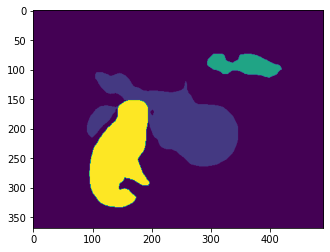

In [ ]:
plt.imshow(predicted)
plt.show()

각 픽셀의 클래스를 시각화하는 함수입니다.

In [ ]:
def decode_segmap(image, nc=21):

    label_colors = np.array([
                (0, 0, 0),  # background
                (128, 0, 0), # aeroplane
                (0, 128, 0), # bicycle
                (128, 128, 0), # bird
                (0, 0, 128), # boat
                (128, 0, 128), # bottle
                (0, 128, 128), # bus 
                (128, 128, 128), # car
                (64, 0, 0), # cat
                (192, 0, 0), # chair
                (64, 128, 0), # cow
                (192, 128, 0), # dining table
                (64, 0, 128), # dog
                (192, 0, 128), # horse
                (64, 128, 128), # motorbike
                (192, 128, 128), # person
                (0, 64, 0), # potted plant
                (128, 64, 0), # sheep
                (0, 192, 0), # sofa
                (128, 192, 0), # train
                (0, 64, 128) # tv/monitor
    ])   

    r = np.zeros_like(image)
    g = np.zeros_like(image)
    b = np.zeros_like(image)

    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]
        
    rgb = np.stack([r, g, b], axis=2)

    return rgb


입력과 출력을 비교해봅니다.

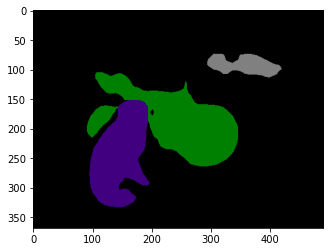

In [ ]:
rgb = decode_segmap(predicted)
plt.imshow(rgb)
plt.show()

인터넷에서 사진을 다운로드해서 사용해봅니다.    
이미지의 크기가 너무 클 경우 컴퓨터가 처리하지 못하니, 사이즈를 줄여서 사용합니다.

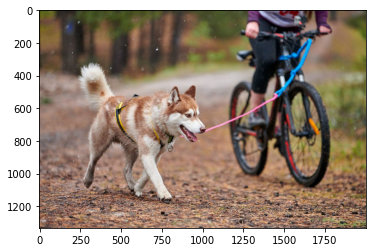

In [ ]:
img = Image.open('./image02.jpg')
plt.imshow(img)
plt.show()

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize([666, 1000]), 
                                transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])])

input = transform(img).to(device)
input = input.unsqueeze(0)
print(input.shape)

torch.Size([1, 3, 666, 1000])


In [ ]:
output = model(input)
print(output['out'].shape)

torch.Size([1, 21, 666, 1000])


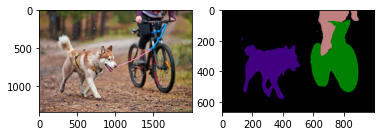

class number : 2, object : bicycle
class number : 12, object : dog
class number : 15, object : person


In [ ]:
predicted = torch.argmax(output['out'].squeeze(), dim = 0)
predicted = predicted.to('cpu').numpy()
rgb = decode_segmap(predicted)

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(rgb)
plt.show()
for i in range(1, 21):
    if i in predicted:
        print('class number : {}, object : {}'.format(i, classes[i]))